In [1]:
import os
import time

import numpy as np
import pandas 
import geopandas

# from shapely.ops import unary_union
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt

import re
#from pprint import pprint

import matplotlib.patches as mpatches
#import matplotlib.transforms as mtransforms
#from matplotlib.transforms import Affine2D as Affine2D
from matplotlib.patches import FancyBboxPatch



thisyear = 2018
this_state = 'FL'
this_state_number = 12

script_dir = '/home/idies/workspace/Storage/raddick/jordanraddick.com/gerrymandering/'
data_dir = '/home/idies/workspace/Storage/raddick/jordanraddick.com/gerrymandering/districts_with_data/'
output_dir = data_dir

acs5_dir = '/home/idies/workspace/Temporary/raddick/census_scratch/acs5/{0:.0f}/estimates/'.format(thisyear)
shapefiledir = '/home/idies/workspace/Temporary/raddick/census_scratch/shapefiles/{0:.0f}/'.format(thisyear)
extras_dir = '/home/idies/workspace/Storage/raddick/census/extras/'


# water_area_tol = 1 * 1000 * 1000
# overlap_area_tract_tol = 22000
# overlap_area_bg_tol = 4000
# #smallest tract in US is Cook County, Illinois Tract 307.02 (area = 22,094 m^2)
# #smallest block group in US is Miami-Dade County, FL, Census Tract 2703, block group 7 (area = 4,436 m^2)
equal_area_crs = {'init': 'epsg:2163'}  # An equal area projection: https://epsg.io/2163

#scale = 1
map_buffer_ratio = 0.1 # extra room on each edge of the maps, in degres
basesize = 16

#plt.rc('axes', prop_cycle=default_cycler)

# district_color_cycle = ['red', 'green', 'orange', 'cyan', 'yellow', 'pink', 'gray', 'lime', 'navajowhite']
# inverse_color_cycle = ['green', 'red', 'navy', 'black', 'purple', 'lime', 'black', 'maroon', 'seagreen']

debug = 1
g = 0

def makebox(manual_xlim, manual_ylim):

    points = []
    points.append(Point(manual_xlim[0],manual_ylim[1]))
    points.append(Point(manual_xlim[1],manual_ylim[1]))
    points.append(Point(manual_xlim[1],manual_ylim[0]))
    points.append(Point(manual_xlim[0],manual_ylim[0]))
    
    coords = [(p.x, p.y) for p in points]    
    metrobox = Polygon(coords)
    
    return metrobox 

def parse_road_name(thename):
    try:
        annotator = thisrow['FULLNAME'][re.search('\d',thisrow['FULLNAME']).start():]
    except AttributeError:
        try: 
            annotator = thisrow['FULLNAME'][re.search('Hwy',thisrow['FULLNAME']).end():]
        except AttributeError:
            annotator = thisrow['FULLNAME']
    return annotator

from matplotlib.path import Path
from matplotlib.patches import BoxStyle
import matplotlib.pyplot as plt


# we may derive from matplotlib.patches.BoxStyle._Base class.
# You need to override transmute method in this case.
class shield(BoxStyle._Base):
    """
    A simple box.
    """

    def __init__(self, pad=0.3):
        """
        The arguments need to be floating numbers and need to have
        default values.

         *pad*
            amount of padding
        """

        self.pad = pad
        super().__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        Given the location and size of the box, return the path of
        the box around it.

         - *x0*, *y0*, *width*, *height* : location and size of the box
         - *mutation_size* : a reference scale for the mutation.

        Often, the *mutation_size* is the font size of the text.
        You don't need to worry about the rotation as it is
        automatically taken care of.
        """

        # padding
        pad = mutation_size * self.pad

        # width and height with padding added.
        width, height = width + 2.*pad, \
                        height + 2.*pad,

        # boundary of the padded box
        x0, y0 = x0-pad, y0-pad,
        x1, y1 = x0+width, y0 + height

        cp = [(0.5*(x0+x1), (y0-2.*pad)), # bottom
              (x1, y0),  # right lower-mid
              (x1+pad, (y0+y1)/2.),  # far right mid
              (x1, y1+pad),  # top right corner
              ((x0+x1)/2,y1),  # dip from top
              (x0, y1+pad),  # top left corner
              (x0-pad, (y0+y1)/2.),    # far left mid
              (x0, y0),  # left lower-mid
              ((x0+x1)/2., (y0-2.*pad)),  # return to bottom
              ((x0+x1)/2., (y0-2.*pad))]
        
        
        com = [Path.MOVETO,  # start
               Path.CURVE4, # curve to right mid
               Path.LINETO,  # line to far right mid
               Path.LINETO, # line to top right corner
               Path.CURVE3,  # line to dip
               Path.LINETO,  # line to top left corner
               Path.CURVE4,   # curve to far left mid
               Path.LINETO,   # line to left lower-mid
               Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path


# register the custom style
BoxStyle._style_list["shield"] = shield

# fig, ax = plt.subplots(figsize=(3, 3))
# ax.text(0.5, 0.5, "Test", size=30, va="center", ha="center",# rotation=30,
#         bbox=dict(boxstyle="shield,pad=0.5", alpha=0.2))

#del BoxStyle._style_list["shield"]

#plt.show()
#BoxStyle._style_list
road_label_format = { 
    'I': { 'labelsize': 14, 'thecolor': 'white', 'thebbox': dict(boxstyle="shield", fc='blue', ec='red') }, 
    'U': { 'labelsize': 11, 'thecolor': 'black', 'thebbox': dict(boxstyle="shield", fc='white', ec='black') },
    'S': { 'labelsize': 9, 'thecolor': 'black', 'thebbox': dict(boxstyle="square,pad=0.25", fc='white', ec='black')},
    'C': { 'labelsize': 10, 'thecolor': 'black', 'thebbox': dict(boxstyle="sawtooth,pad=0.5", fc='white') }, 
    'M': { 'labelsize': 9, 'thecolor': 'black'},
    'O': { 'labelsize': 9, 'thecolor': 'red' }
}

print('ok')

ok


labeling big roads in map area...


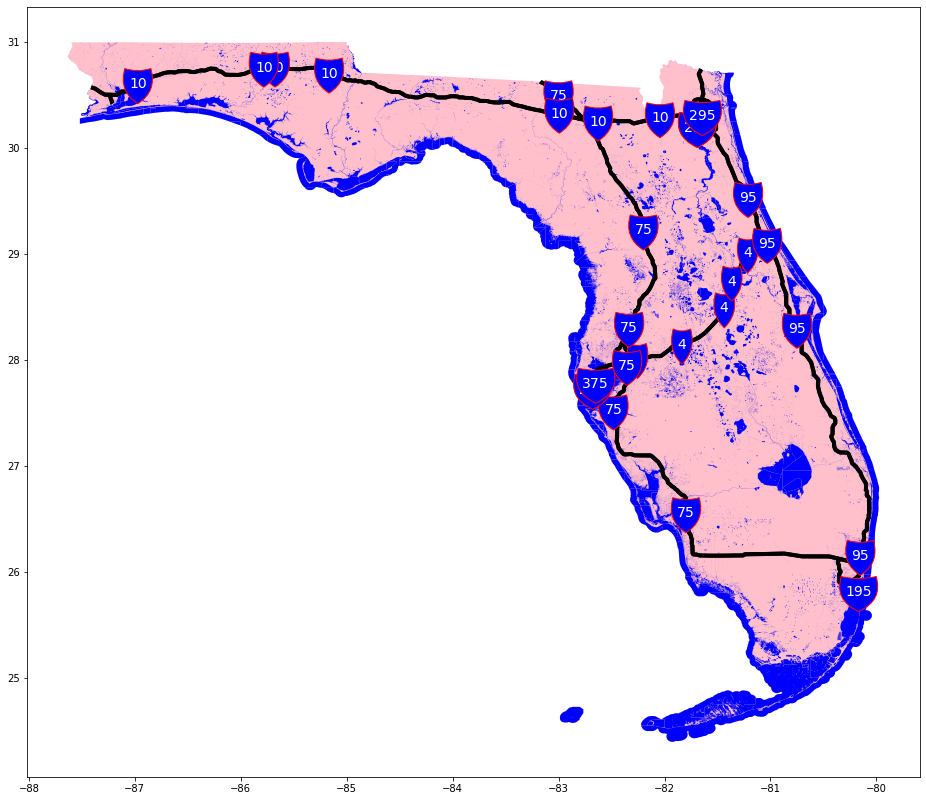

ok


In [15]:
xlimits = state_gdf.geometry.apply(lambda x: (x.bounds[0], x.bounds[2])).values[0]
ylimits = state_gdf.geometry.apply(lambda x: (x.bounds[1], x.bounds[3])).values[0]

xspan = xlimits[1] - xlimits[0]
yspan = ylimits[1] - ylimits[0]
aspect_ratio = xspan / yspan

xbuffer = xspan * map_buffer_ratio
ybuffer = yspan * map_buffer_ratio

xlimits = state_gdf.geometry.apply(lambda x: (x.bounds[0] - xbuffer, x.bounds[2] + xbuffer)).values[0]
ylimits = state_gdf.geometry.apply(lambda x: (x.bounds[1] - ybuffer, x.bounds[3] + ybuffer)).values[0]

map_area_geo = makebox(xlimits, ylimits)


fig, ax = plt.subplots(1,1,figsize=(basesize,basesize*aspect_ratio))

state_gdf.plot(ax=ax, color='pink')
water_gdf.plot(ax=ax, color='blue')
roads_gdf[roads_gdf['RTTYP'] == 'I'].plot(color='black',ax=ax, lw=4)
#roads_gdf[roads_gdf['RTTYP'] == 'U'].plot(color='black',ax=ax, lw=2)

cnt = 0
print('labeling big roads in map area...')
for ix, thisrow in roads_gdf[(roads_gdf['FULLNAME'].notnull()) & (roads_gdf['RTTYP'].isin(['I']))].iterrows():
    annotator = parse_road_name(thisrow['FULLNAME'])
    centerpoint = Point((thisrow.geometry.centroid.x, thisrow.geometry.centroid.y))
    if (map_area_geo.contains(centerpoint)):
        if (len(annotator) <= 3):
            if (np.mod(cnt+1,5) == 0):
                plt.annotate(annotator, (thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), (thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                             color=road_label_format[thisrow['RTTYP']]['thecolor'], backgroundcolor='white', ha='center', va='center',
                             fontsize=road_label_format[thisrow['RTTYP']]['labelsize'], bbox=road_label_format[thisrow['RTTYP']]['thebbox'])
    cnt += 1
plt.savefig('flinterstates.png', fmt='png')
plt.show()
print('ok')

In [2]:
if (debug >= 1):
    print('reading state shapefile for {0:}...'.format(this_state))

    
state_gdf = geopandas.read_file(shapefiledir+'tl_2018_us_state.shp')
state_gdf.loc[:, 'STATEFP'] = pandas.to_numeric(state_gdf['STATEFP'], errors='coerce')
state_gdf = state_gdf[state_gdf['STATEFP'] == this_state_number]

s = time.time()
if (debug >= 1):
    print('reading water shapefiles in {0:}...'.format(this_state))

water_gdf = geopandas.GeoDataFrame()
water_file_list = [shapefiledir+'AREAWATER/'+x for x in os.listdir(shapefiledir+'AREAWATER/') if ((x[-4:] == '.shp') and ('tl_2018_{0:02d}'.format(this_state_number) in x))]

for i in range(0, len(water_file_list)):
    if (debug >= 1):
        if ((np.mod(i,10) == 0) | (i == len(water_file_list)-1)):
            print('\tReading file {0:,.0f} of {1:,.0f}...'.format(i+1, len(water_file_list)))
    water_gdf_i = geopandas.read_file(water_file_list[i])
    #water_gdf_i = water_gdf_i[water_gdf_i['AWATER'] >= water_area_tol]
    water_gdf = pandas.concat((water_gdf, water_gdf_i), axis=0, sort=False)

water_gdf = water_gdf.set_index('HYDROID')

if (debug >= 1):
    print('reading road shapefiles in {0:}...'.format(this_state))

roads_gdf = geopandas.GeoDataFrame()
roads_file_list = [shapefiledir+'ROADS/'+x for x in os.listdir(shapefiledir+'ROADS/') if ((x[-4:] == '.shp') and ('tl_2018_{0:02d}'.format(this_state_number) in x))]

for i in range(0, len(roads_file_list)):
    if (debug >= 1):
        if ((np.mod(i,10) == 0) | (i == len(roads_file_list)-1)):
            print('\tReading file {0:,.0f} of {1:,.0f}...'.format(i+1, len(roads_file_list)))
    roads_gdf_i = geopandas.read_file(roads_file_list[i])
    
    roads_gdf = pandas.concat((roads_gdf, roads_gdf_i), axis=0, sort=False)

roads_gdf = roads_gdf.set_index('LINEARID')
e = time.time()
g = g + (e-s)
print('Done in {0:,.0f} seconds!'.format(e-s))

reading state shapefile for FL...
reading water shapefiles in FL...
	Reading file 1 of 67...
	Reading file 11 of 67...
	Reading file 21 of 67...
	Reading file 31 of 67...
	Reading file 41 of 67...
	Reading file 51 of 67...
	Reading file 61 of 67...
	Reading file 67 of 67...
reading road shapefiles in FL...
	Reading file 1 of 67...
	Reading file 11 of 67...
	Reading file 21 of 67...
	Reading file 31 of 67...
	Reading file 41 of 67...
	Reading file 51 of 67...
	Reading file 61 of 67...
	Reading file 67 of 67...
Done in 171 seconds!
